In [1]:
import numpy as np
import matplotlib.pyplot as plt

from slider import Preprocessing, Analyze, ImageAnalysis
from slider import PredictionSample

In [2]:
photoelasticImageData, whiteLightImageData, forceData, trackingData, metadata = Preprocessing.loadSliderData(loadCachedData=True, saveCachedData=True)
peakIndices = Preprocessing.identifyPeaks(forceData)
timeArr = [forceData[0][:,1]]

Reading tracking data from cache: Cache/Tracking/shape0_01.pickle


In [3]:
metrics = [ImageAnalysis.varianceBrightness, ImageAnalysis.averageBrightness]

metricList = Analyze.analyze(photoelasticImageData, trackingData, metrics, metadata)

Reading analysis result from cache: Cache/Analysis/shape_01_averageBrightness_21997.pickle
Reading analysis result from cache: Cache/Analysis/shape_01_varianceBrightness_21997.pickle


In [8]:
inputArr, outputArr = PredictionSample.predictionSample(metricList, peakIndices, timeArr=timeArr, desiredOutcome=None, downsampleFactor=6)

[1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]


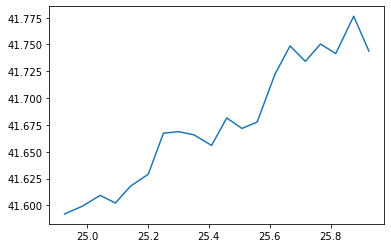

In [9]:
plt.plot(inputArr[0,-1,:], inputArr[0,1,:])
print(outputArr)

In [9]:
print(timeArr[0][peakIndices[0]])

[  1.3966  10.367   21.22    26.067   32.189   41.959   43.741   50.163
  54.569   58.7     64.298   73.501   80.031   88.377   91.55    98.821
 108.64   112.89   118.17   123.12   127.81   132.22   135.76   141.74
 149.32   154.24   158.14   161.94   168.66   171.19   176.56  ]
